# Unsupervised Learning (K_means)

Author: Christoph Guettner


**Abstract:**  
Im Unterschied zum _supervised learning_ werden beim _unsupervised learning_   
keine gelabelten Datensätze verwendet. D.h. es gibt keine aprori Klassifikationsmuster,  
sondern die entsprechenden Cluster werden aufgrund von Ähnlichkeit  
innerhalb der angewendeten Metrik (Euklidische Distanz) gebildet.   
Im Folgenden werden drei Datensätze mittels der K-Means Methode klassifiziert.  
Die jeweilige Anzahl der CLuster wird mittels der    
_Sum of Squared Errors Function_ ermittelt.  

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Class Imports](#Class_Imports)
    * [Functions](#Functions)
    * [Explorative Data Visualisation](#Explorative_Data_Visualisation)

* [Model Selection](#Model_Selection)
    * [Scree Plot](#Scree_Plot)
    
* [Learned Patterns](#Learned_Patterns)
    * [Model Prediction](#Model_Prediction)
    * [Explanatory Data Visualisation](#Explanatory_Data_Visualisation)





    

## Loading_and_Preprocessing

### Class_Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs, make_s_curve
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 


In [3]:
#Functions

def load_blobs(n_samples, centers):
    X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, \
                    random_state=0, cluster_std=10)
    return X,y

def get_S(n_samples):
    X, y = make_s_curve(n_samples=n_samples, noise=0.3, random_state=42)
    X=np.delete(X,np.s_[1:2],1)
    return X,y

def get_sinus(n_samples):
    sin1= np.linspace(0, 21, n_samples)
    sin2 = np.piecewise(sin1,[sin1<= 7, (sin1 > 7) & (sin1 < 14), 14 < sin1], \
        [lambda x: np.sin(x).ravel()+ np.sin(2 * x).ravel(),\
        lambda x: np.sin(x).ravel()-2+ np.sin(1.5*x).ravel(), \
        lambda x: np.cos(x).ravel()+2+ np.cos(1.5 * x).ravel()])
    X_sin = np.vstack((sin1,sin2)).T
    return X_sin

def get_Dataframe(X1,X2,X3):
    dict = {'feature_C1': X1[:,0], 'feature_C2': X1[:,1], \
            'feature_S1': X2[:,0], 'feature_S2': X2[:,1],\
            'feature_sin1': X3[:,0], 'feature_sin2': X3[:,1]}
    df= pd.DataFrame(dict)
    return df, dict

def plot_Data(df, data_names):
    fig = plt.figure(figsize=(15,5),facecolor=(.18, .31, .31))
    fig.suptitle('Raw Data', color ='0.7')
    k=1
    for i in range(len(df.columns)):
        if i%2 == 0:
            ax = fig.add_subplot(1,3,k)
            ax.set_title(data_names[k-1], color='orange')
            ax.scatter(df.iloc[:,i],df.iloc[:,(i+1)])
            ax.set_xlabel('feature 2', color='0.7')
            ax.set_ylabel('feature 1', color='0.7')
            plt.legend([])
            ax.tick_params(labelcolor='tab:orange')
            k+=1

def get_SumOfSquaredError_from_kmeans(df, k_rng):
    sse=[]
    for k in range(1,k_rng):
        km = KMeans(n_clusters=k)
        for i in range(len(df.columns)):
            if i%2 == 0:
                km.fit(df.iloc[:, np.r_[i,(i+1)]])
                sse.append(km.inertia_)
    return sse

def get_every_nth_elements(list, df):
    nth = int(len(df.columns)/2)
    list_sorted = [list[i::nth] for i in range(nth)]
    return list_sorted

def plot_multiple_ScreePlots(k_rng, error_list_sorted, data_names):
    fig, axes = plt.subplots(1,3, figsize=(15,5), facecolor=(.18, .31, .31))
    fig.suptitle('Error for k Centers', color ='0.7')
    k=0
    k_rng= range(1,k_rng)
    for i,ax in enumerate(axes.flatten()):
        ax.plot(k_rng,error_list_sorted[i])
        ax.set_title(data_names[k], color='orange')
        ax.set_xlabel('k', color='0.7')
        ax.set_ylabel('Sum of squared error', color='0.7')
        plt.legend([])
        ax.tick_params(labelcolor='tab:orange')
        k+=1

def learn_pattern_kmeans(Data, n_clusters):
    Learning_Results, Center_Learned=[],[]
    for i in range(len(Data)):
        km = KMeans(n_clusters=n_clusters[i])
        y_learned = km.fit_predict(Data[i])
        center_learned = km.cluster_centers_
        Learning_Results.append(y_learned)
        Center_Learned.append(center_learned)
    return Learning_Results, Center_Learned

def get_newColumn(df, new):
    df.insert(2,'LR_3',new[0], True)
    df.insert(5,'LR_S',new[1],True)
    df['LR_sin']=new[2]
    return df

def plot_multiple_learned_patterns(df, learned_center, data_names):
    fig = plt.figure(figsize=(15,5),facecolor=(.18, .31, .31))
    fig.suptitle('Learned Pattern', color ='0.7')
    k=1
    for i in range(len(df.columns)):
        if i%3 == 0:
            ax = fig.add_subplot(1,3,k)
            ax.set_title(data_names[k-1], color='orange')
            ax.scatter(df.iloc[(df.iloc[:,(i+2)]==0).values,i],df.iloc[(df.iloc[:,(i+2)]==0).values,(i+1)], color='blue')
            ax.scatter(df.iloc[(df.iloc[:,(i+2)]==1).values,i],df.iloc[(df.iloc[:,(i+2)]==1).values,(i+1)], color='orange')
            ax.scatter(df.iloc[(df.iloc[:,(i+2)]==2).values,i],df.iloc[(df.iloc[:,(i+2)]==2).values,(i+1)], color='red')
            ax.scatter(df.iloc[(df.iloc[:,(i+2)]==3).values,i],df.iloc[(df.iloc[:,(i+2)]==3).values,(i+1)], color='green')
            ax.scatter(Center_Learned[k-1][:,0],Center_Learned[k-1][:,1], marker='*')
            ax.set_xlabel('feature 2', color='0.7')
            ax.set_ylabel('feature 1', color='0.7')
            plt.legend([])
            ax.tick_params(labelcolor='tab:orange')
            k+=1

In [4]:
#get Data
n_samples=1000

#get blobs
centers_list = [(22,28), (68, 64), (75, 23)]
X_blobs, y_blobs = load_blobs(n_samples, centers_list)
#get S
X_S, y_S = get_S(n_samples)
#get sinus
X_sinus =get_sinus(n_samples)


df_feature, dict_feature = get_Dataframe(X_blobs, X_S,X_sinus)
df_feature.head(3)

,feature_C1,feature_C2,feature_S1,feature_S2,feature_sin1,feature_sin2
0,11.514470,13.799821,-1.188924,0.725337,0.000000,0.000000
1,39.640523,32.001572,-1.142107,-0.694515,0.021021,0.063049
2,70.042045,35.165777,0.748429,-2.129549,0.042042,0.126015


### Explorative_Data_Visualisation

Im folgenden werden drei Datensätze mit jeweils zwei _Featuren_   
generiert (Cluster, S-Form, Sinus). Im ersten Datensatz werden drei,  
um die jeweilgen Center normalverteilten Cluster erzeugt.   
Im Zweiten wird eine S-Form und im Dritten eine Überlagerung  
von Sinus Wellen erzeugt. 

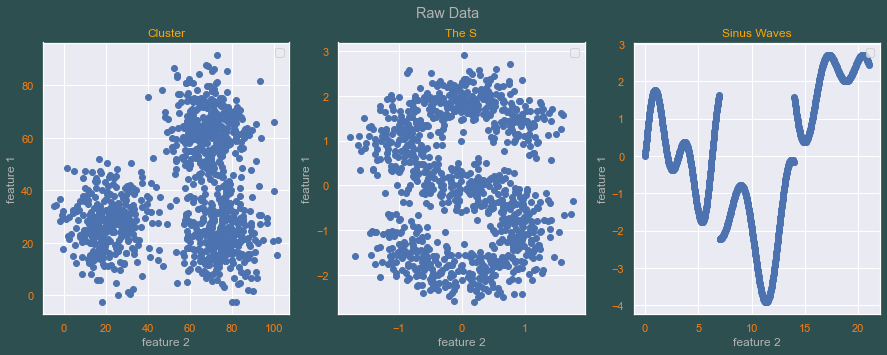

In [5]:
datanames=['Cluster', 'The S', 'Sinus Waves']   
plot_Data(df_feature, datanames)

## Model_Selection

### Scree_Plots

Im Folgenden werden für jeden Datensatz verschiedene Anzahlen von  
_Cluster Centern_ ermittelt und die jeweilig resultierenden Fehler  
in einem _Scree Plot_ dargestellt. Typischerweise ergibt sich dabei  
eine Ellenbogenform (Hyperbel), an welcher sich die optimale  
Anzahl von _Cluster Centern_ ablesen läßt. 

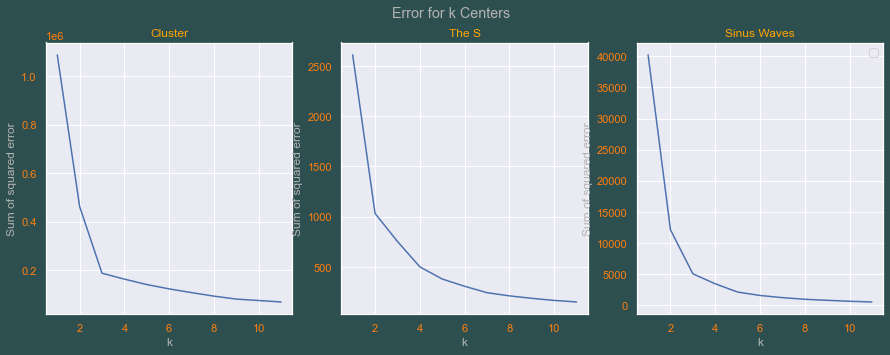

In [6]:
# get sum of squard errros
SumOFSquardError = get_SumOfSquaredError_from_kmeans(df_feature, 12)
SumOFSquardError_sorted = get_every_nth_elements(SumOFSquardError, df_feature)
plot_multiple_ScreePlots(12,SumOFSquardError_sorted, datanames)


## Learned_Patterns

### Model_Prediction

Oben wurden im ersten Datensatz drei Cluster, im zweiten Datensatz vier Cluster  
und im dritten Datensatz wieder drei Cluster ermittelt.  
Die Optimalität der Clusterwahl ergibt sich aus dem Trade-Off zwischen dem zu  
kleinteiligen _Overfitting_ (mangelnde Generalisierbarkeit) und dem zu groben _Underfitting_. 

In [7]:
clusters=[3,4,3]
data = [X_blobs,X_S,X_sinus]

Learning_Results, Center_Learned = learn_pattern_kmeans(data, clusters)
df_new = get_newColumn(df_feature,Learning_Results)

df_new.head(5)

,feature_C1,feature_C2,LR_3,feature_S1,feature_S2,LR_S,feature_sin1,feature_sin2,LR_sin
0,11.514470,13.799821,1,-1.188924,0.725337,1,0.000000,0.000000,1
1,39.640523,32.001572,1,-1.142107,-0.694515,0,0.021021,0.063049,1
2,70.042045,35.165777,2,0.748429,-2.129549,0,0.042042,0.126015,1
3,89.167910,47.891216,0,0.911731,-0.411717,3,0.063063,0.188813,1
4,67.691264,6.582968,2,0.374262,2.187132,2,0.084084,0.251362,1


### Explanatory_Data_Visualisation

In der erklärenden Datenvisualisierung werden   
die gelernten Klassen und die jeweiligen   
_Cluster Center_ (Stars) in verschiedenen Farben  
dargestellt.

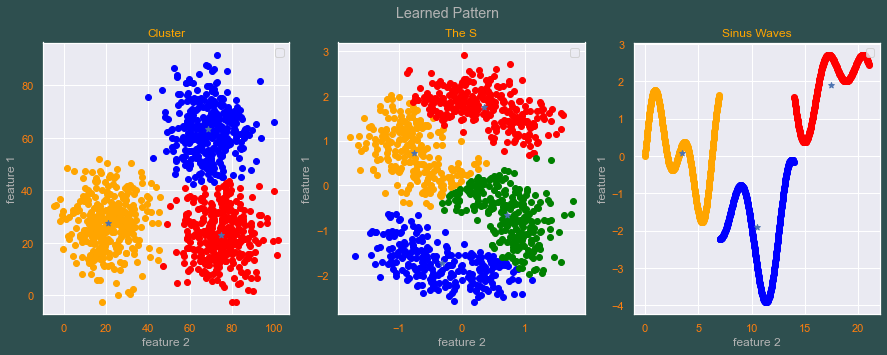

In [8]:
plot_multiple_learned_patterns(df_new, Center_Learned, datanames)
